# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
total_drivers_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
av_fare_per_ride = total_fares_city_type / total_rides_city_type

In [7]:
# 5. Get the average fare per driver for each city type. 
av_fare_per_driver = total_fares_city_type / total_drivers_city_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_city_type,
                                  "Total Drivers": total_drivers_city_type,
                                  "Total Fares": total_fares_city_type,
                                  "Average Fare per Ride": av_fare_per_ride,
                                  "Average Fare per Driver": av_fare_per_driver})
pyber_summary_df            

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

In [11]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4256850000000,4,Rural


In [13]:
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])

In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_date_df = pd.DataFrame(pyber_data_df.groupby(["date", "type"]).sum()["fare"])
total_fare_date_df

,,fare
date,type,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_date_df = total_fare_date_df.reset_index(level="type")
total_fare_date_df

,type,fare
date,,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_pivot_df = total_fare_date_df.pivot(columns="type", values="fare")
total_fare_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_df = total_fare_pivot_df.loc["2019-01-01":"2019-04-28"]
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week_df = fare_by_date_df.resample("W").sum()
fare_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


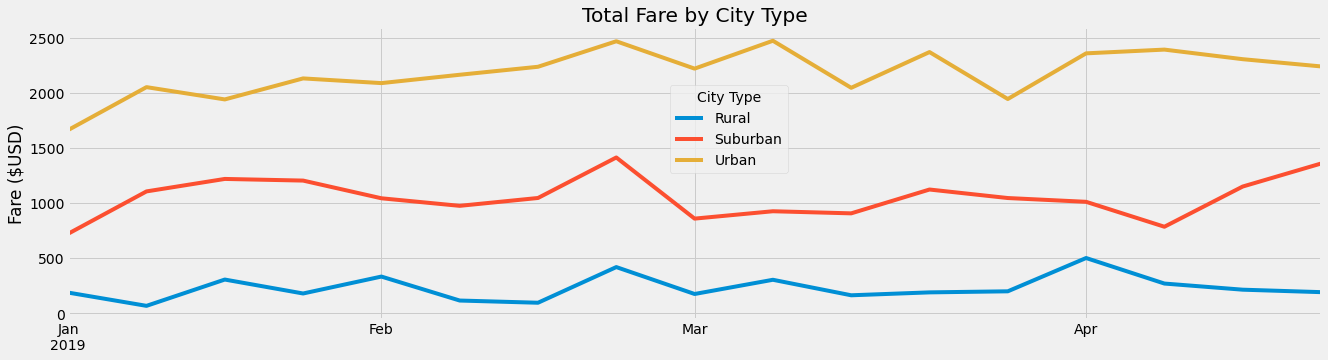

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#fig, fare_by_week_df = plt.subplots()


fare_by_week_df.plot(title="Total Fare by City Type", figsize=(20, 5))
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.legend(title="City Type", loc=(.48, .5))
plt.savefig("Analysis/Pyber_fare_summary.png", bbox_inches="tight")



